In [60]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

import numpy as np

from glob import glob
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True
# Data per Cycle
#Reduce if blue screen


In [61]:
data_path = 'C:\\Users\\kenny\\Desktop\\trainskin\\data\\'

train_path = data_path + 'train\\'
test_path = data_path + 'test\\'
val_path = data_path + 'validate\\'



In [62]:
folders = glob( 'C:\\Users\\kenny\\Desktop\\trainskin\\data\\train\\*')
len(folders)



4

In [63]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [64]:

used_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [65]:
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# The last 15 layers fine tune
for layer in used_model.layers[:-15]:
    layer.trainable = False


x = used_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(units=512, activation='relu', kernel_regularizer=l2(0.0001))(x)  # First Dense layer
x = Dropout(0.2)(x)

x = Dense(units=256, activation='relu', kernel_regularizer=l2(0.0001))(x)  # Second Dense layer
x = Dropout(0.2)(x)




#unit change to 4 or 5 after adding the acne and combination datasets
output  = Dense(units=4, activation='softmax')(x)

model = Model(used_model.input, output)

#model.summary()

In [66]:
loss = tf.keras.losses.CategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

# Assistant
The error occurs because the variable 'model' is being used in the 'model.compile' line before it has been defined. The 'model' variable needs to be defined before it can be used in the 'model.compile' line.

Would you like me to provide the corrected code?

In [69]:


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,         # Reduced rotation range
    width_shift_range=0.05,    # Reduced width shift
    height_shift_range=0.05,   # Reduced height shift
    shear_range=0.0,           # Removed shearing
    zoom_range=[1.0, 1.1],     # Slight zoom in
    brightness_range=[0.9, 1.1], # Narrowed brightness range
    horizontal_flip=True,      # Use cautiously
    vertical_flip=False,       # Removed vertical flip
    fill_mode='nearest'        # Keep fill mode
)



In [70]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [71]:
# Make sure you provide the same target size as initialied for the image size
# Change batch if encoutering blue screen
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')


Found 731 images belonging to 4 classes.


In [72]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 60 images belonging to 4 classes.


In [73]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('skin_modelV5.h5', 
    verbose=1,  
    monitor='val_accuracy',
    save_best_only=True, 
    mode='auto'
)  

In [74]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
) 
# avoid potential overfitting

In [75]:
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reduce the learning rate by a factor of 0.5
    patience=5,  # Wait for 5 epochs before reducing
    min_lr=1e-6  # Minimum learning rate
)

In [76]:
# fit the model
# Run the cell. It will take some time to execute
# Change epoch when needed
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs= 50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
    callbacks=[checkpoint, early_stopping, lr_scheduler ]
)

Epoch 1/50
12/12 [==============================] - ETA: 0s - loss: 1.6263 - accuracy: 0.2544
Epoch 1: val_accuracy improved from -inf to 0.16667, saving model to skin_modelV5.h5


C:\ProgramData\anaconda3\envs\forMLS\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12/12 [==============================] - 31s 2s/step - loss: 1.6263 - accuracy: 0.2544 - val_loss: 1.5944 - val_accuracy: 0.1667 - lr: 1.0000e-05
Epoch 2/50
12/12 [==============================] - ETA: 0s - loss: 1.5230 - accuracy: 0.3037
Epoch 2: val_accuracy improved from 0.16667 to 0.30000, saving model to skin_modelV5.h5
12/12 [==============================] - 23s 2s/step - loss: 1.5230 - accuracy: 0.3037 - val_loss: 1.5110 - val_accuracy: 0.3000 - lr: 1.0000e-05
Epoch 3/50
12/12 [==============================] - ETA: 0s - loss: 1.4551 - accuracy: 0.3461
Epoch 3: val_accuracy improved from 0.30000 to 0.38333, saving model to skin_modelV5.h5
12/12 [==============================] - 24s 2s/step - loss: 1.4551 - accuracy: 0.3461 - val_loss: 1.4551 - val_accuracy: 0.3833 - lr: 1.0000e-05
Epoch 4/50
12/12 [==============================] - ETA: 0s - loss: 1.4370 - accuracy: 0.3570
Epoch 4: val_accuracy improved from 0.38333 to 0.51667, saving model to skin_modelV5.h5
12/12 [=========

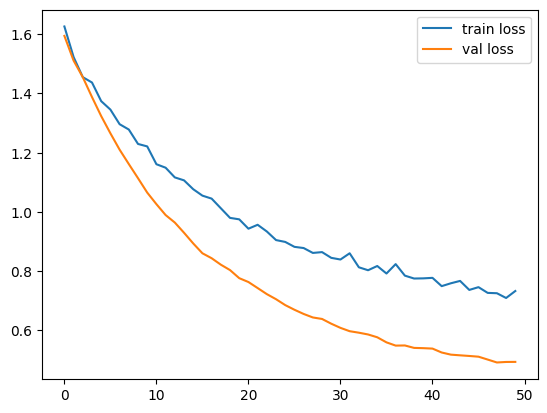

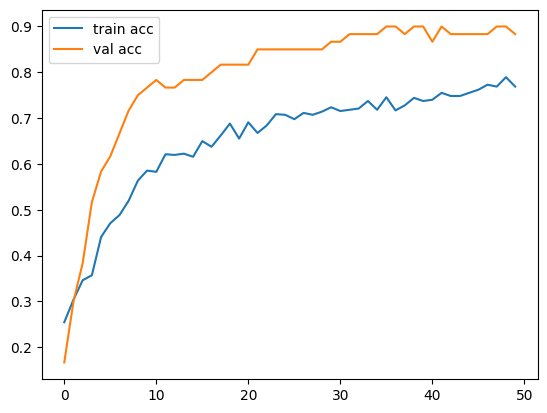

<Figure size 640x480 with 0 Axes>

In [77]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [122]:

from torch.utils.tensorboard import SummaryWriter


writer = SummaryWriter()


for epoch in range(num_epochs):
    # Training code...
    
    # Log accuracy and loss values
    
    writer.add_scalar('Accuracy', accuracy, epoch)
    writer.add_scalar('Loss', loss, epoch)

ModuleNotFoundError: No module named 'torch'

In [123]:
tensorboard --logdir=logs

SyntaxError: cannot assign to operator (1238082722.py, line 1)

In [10]:
from tensorflow.keras.models import load_model

saved_model = model.save('skin_modelV5.h5')

NameError: name 'model' is not defined

In [11]:
# import os
# os.chdir("C:\\Users\\kenny\\Desktop\\skin_types\\model7.keras")

In [12]:
# import tensorflow as tf

# model = tf.keras.models.load_model("skin_type_model_4.h5")

# converter = tf.lite.TFLiteConverter.from_keras_model(model) # path to the SavedModel directory
# tflite_model = converter.convert()
# tflite_model = converter.convert()
# open("converted_model.tflite", "wb").write(tflite_model)

In [13]:
y_pred = model.predict(test_set)

NameError: name 'model' is not defined

In [14]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

NameError: name 'y_pred' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample predicted labels (y_pred)
y_pred = np.random.randint(0, 4, 100)  # Example data, replace with your actual y_pred

# Plot histogram of predicted labels
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=np.arange(y_pred.min(), y_pred.max() + 2) - 0.5, edgecolor='black')
plt.xticks(np.arange(y_pred.min(), y_pred.max() + 1))
plt.title('Histogram of Predicted Labels')
plt.xlabel('Predicted Label')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

NameError: name 'ConfusionMatrixDisplay' is not defined

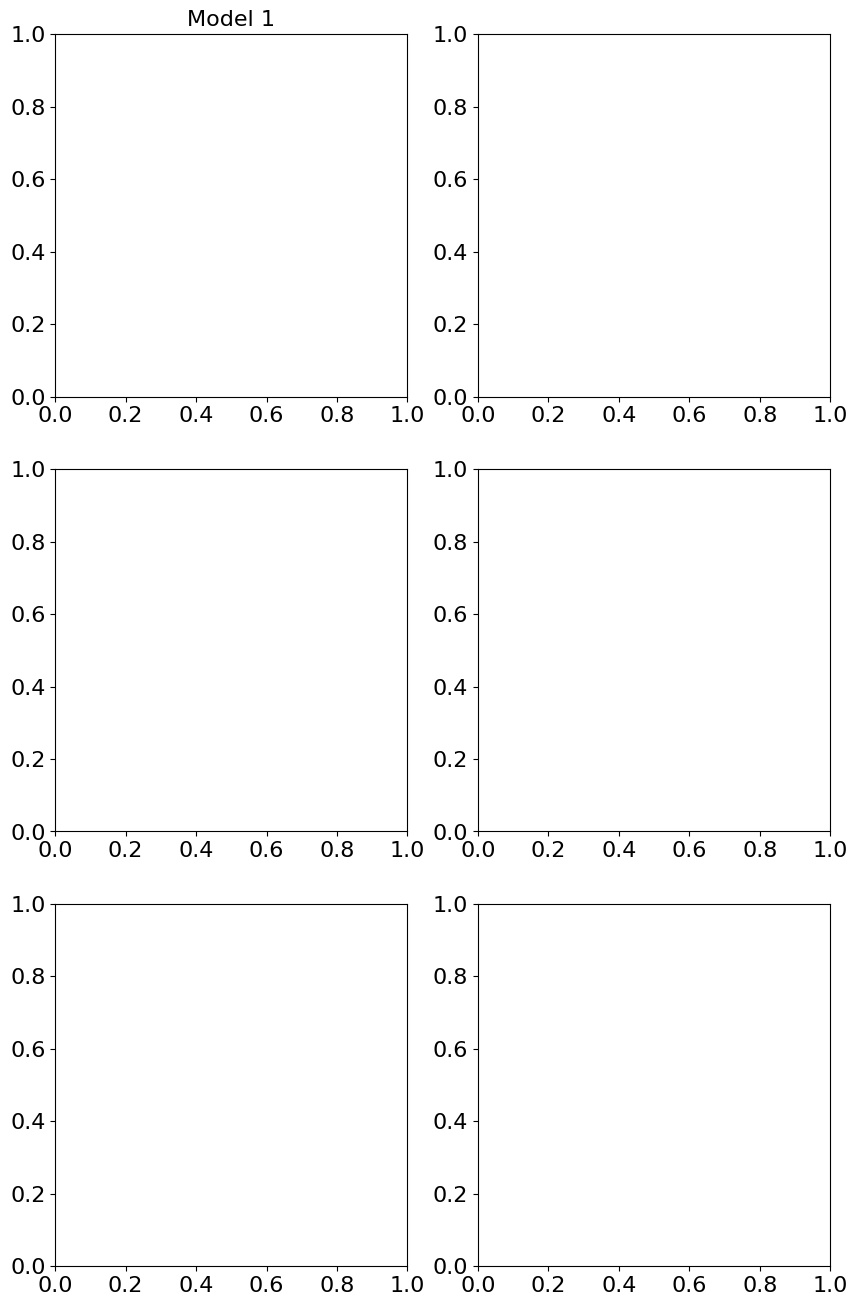

In [83]:
# Set formatting and styling options for the confusion matrices
title_size = 16
plt.rcParams.update({'font.size':16})
display_labels = ["Class 1", "Class 2", "Class 3", "Class 4"]  # Customize labels of the classes
colorbar = False
cmap = "Blues"  # Try "Greens". Change the color of the confusion matrix.
## Please see other alternatives at https://matplotlib.org/stable/tutorials/colors/colormaps.html
values_format = ".3f"  # Determine the number of decimal places to be displayed.

# Create subplots for given confusion matrices
f, axes = plt.subplots(3, 2, figsize=(10, 16))

# Plot the first confusion matrix (Model 1) at position (0, 0)
axes[0, 0].set_title("Model 1", size=title_size)
ConfusionMatrixDisplay(confusion_matrix=cm00, display_labels=display_labels).plot(
    include_values=True, cmap=cmap, ax=axes[0, 0], colorbar=colorbar, values_format=values_format)

# Remove x-axis labels and ticks
axes[0, 0].xaxis.set_ticklabels(['', '', '', ''])
axes[0, 0].set_xlabel('')
axes[0, 0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

In [ ]:
import seaborn as sns
import numpy as np

# Assuming cf_matrix is a 2x2 confusion matrix
cf_matrix = np.array([[13, 2], [1, 10]])  # Example confusion matrix

# Custom function to plot confusion matrix (adjust as needed)
def make_confusion_matrix(cf_matrix, group_names=None, categories=None, cmap='Blues'):
    plt.figure(figsize=(8, 6))
    
    sns.heatmap(cf_matrix, annot=True, fmt="d", cmap=cmap, xticklabels=categories, yticklabels=group_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

# Labels for each class
labels = ["acne", "dry", "normal", "oily"]
categories = ["zero", "one"]  # Adjust depending on the number of classes

# Plot confusion matrix
make_confusion_matrix(cf_matrix, group_names=labels, categories=categories, cmap="Blues")


In [2]:
classes = ["acne","dry", "normal", "oily"]

In [5]:
from keras.applications.vgg16 import decode_predictions

def predict_image(img):
    plt.figure(figsize=(40,8))
    # print()
    # print('-----------------------------------Skin Type Detection---------------------------------------------------')
    # print()
    # print('----------------------------------------------RESULT-------------------------------------------------------------')
    # print()
    x=image.img_to_array(img)
    x=x/255
    # plt.imshow(img)
    x=np.expand_dims(x,axis=0)
    #img_data=preprocess_input(x)

    # print("Prediction: ", classes[np.argmax(model.predict(x))])
    
    result = model.predict(x)
    percent = int(result.max() *100)
    
    # print("Percent of Prediction: {}% ".format(percent))
    
    # print(result)
    # for i in range(len(result[0])):
    #     if result[0][i] * 100 > 40:
            # print(classes[i], str(int(result[0][i] * 100)) + "%")
    return result, classes[np.argmax(model.predict(x))]

In [7]:
im = image.load_img("C:\\Users\\kenny\\Desktop\\datasets\\manual-datasets-20241012T083358Z-001\\manual-datasets\\normal\\normal6.jpg",target_size=(224,224))

predict_image(im)


NameError: name 'image' is not defined

In [8]:
import os


test_folders = ["acne", "dry", "normal", "oily"]
results = [[]]
count = 0
for step in test_folders:
    
    test_folder_path = val_path + step + "\\"
    test_files = os.listdir(test_folder_path)
    test_file_paths = []
    
    for i in test_files:
        test_file_paths.append(test_folder_path + i)
    
    for j in test_file_paths: 
        im = image.load_img(j,target_size=(224,224))
        result, class_predicted = predict_image(im)
        if step == class_predicted:
            results[count].append(1)
        else:
            results[count].append(0)
    count += 1
    results.append([])

NameError: name 'val_path' is not defined

In [9]:
print(results)

[[]]


In [92]:
print("ACNE \tTest\t" + str(sum(results[0])) + "/" + str(len(results[0])))
print("DRY \tTest\t" + str(sum(results[1])) + "/" + str(len(results[1])))
print("NORMAL \tTest\t" + str(sum(results[2])) + "/" + str(len(results[2])))
print("OILY \tTest\t" + str(sum(results[3])) + "/" + str(len(results[3])))

ACNE 	Test	16/20
DRY 	Test	11/20
NORMAL 	Test	15/20
OILY 	Test	17/20


In [138]:
#export model

#model = Model(inputs=used_model.input, outputs=output)
#converter = tf.lite.TFLiteConverter.from_keras_model(model)
#tflite_model = converter.convert()

# Save the model.
#with open('model.tflite', 'wb') as f:
 #   f.write(tflite_model)

In [93]:
print("________________________RESULT _____________________________________")

res = [
    results[0],  # ACNE
    results[1],  # DRY
    results[2],  # NORMAL
    results[3],  # OILY# Empty
]

categories = ["ACNE", "DRY", "NORMAL", "OILY"]

total_correct = 0
total_tests = 0

for i, result in enumerate(res):
    if result:
        correct = sum(result)
        total = len(result)
        total_correct += correct
        total_tests += total
        print(f"{categories[i]}: Test {correct}/{total} ({(correct / total) * 100:.2f}%)")
    else:
        print(f"{categories[i]}: No data available")

# Calculate overall percentage
if total_tests > 0:
    overall_percentage = (total_correct / total_tests) * 100
    print(f"\nTotal: {total_correct}/{total_tests} ({overall_percentage:.2f}%)")
else:
    print("No tests available.")


________________________RESULT _____________________________________
ACNE: Test 16/20 (80.00%)
DRY: Test 11/20 (55.00%)
NORMAL: Test 15/20 (75.00%)
OILY: Test 17/20 (85.00%)

Total: 59/80 (73.75%)


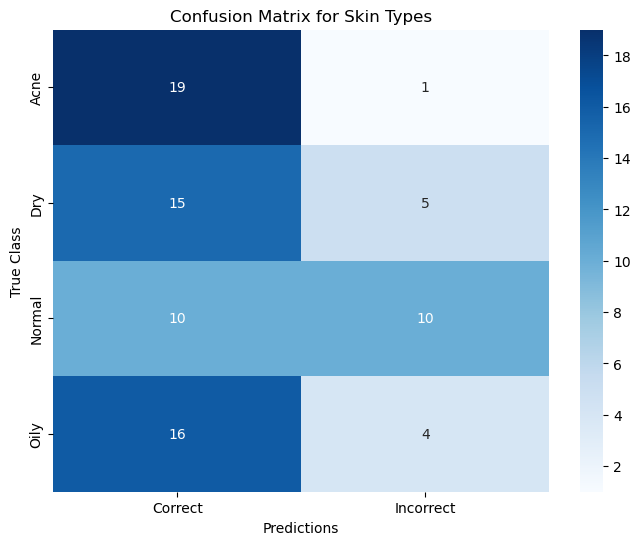

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# The result data provided

# Calculate correct and incorrect predictions for each class
cf_matrix = np.array([
    [sum(results[0]), len(results[0]) - sum(results[0])],  # Acne
    [sum(results[1]), len(results[1]) - sum(results[1])],  # Dry
    [sum(results[2]), len(results[2]) - sum(results[2])],  # Normal
    [sum(results[3]), len(results[3]) - sum(results[3])],  # Oily
])

# Labels for each class
labels = ["Acne", "Dry", "Normal", "Oily"]
categories = ["Correct", "Incorrect"]

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=labels)
plt.title('Confusion Matrix for Skin Types')
plt.xlabel('Predictions')
plt.ylabel('True Class')
plt.show()


In [94]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Provided data (results)

# Create confusion matrix based on provided results
cf_matrix = np.array([
    [sum([1 for x in results[0] if x == 0]), sum([1 for x in results[0] if x == 1])],  # Acne
    [sum([1 for x in results[1] if x == 0]), sum([1 for x in results[1] if x == 1])],  # Dry
    [sum([1 for x in results[2] if x == 0]), sum([1 for x in results[2] if x == 1])],  # Normal
    [sum([1 for x in results[3] if x == 0]), sum([1 for x in results[3] if x == 1])],  # Oily
])

# Custom labels
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']

# Function to plot confusion matrix with custom labels
def make_confusion_matrix(cf_matrix, group_names=None, categories='auto', cmap='binary'):
    """
    This function will make a confusion matrix using seaborn's heatmap.
    
    Args:
        cf_matrix (2x2 numpy array): confusion matrix from sklearn.metrics.confusion_matrix
        group_names (list): List of strings that represent the labels row-wise for the matrix.
        categories (list): List of categories for x and y axis labels.
        cmap (str): The color map to be used for the heatmap.
    """
    # Creating an array for annotations
    group_counts = [f"{value:0.0f}" for value in cf_matrix.flatten()]
    group_percentages = [f"{value:.2%}" for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    box_labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]

    box_labels = np.asarray(box_labels).reshape(cf_matrix.shape[0], cf_matrix.shape[1])

    # Set up the matplotlib figure
    plt.figure(figsize=(8, 6))
    sns.heatmap(cf_matrix, annot=box_labels, fmt="", cmap=cmap, xticklabels=categories, yticklabels=categories)

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Plot the confusion matrix with custom labels
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')


ModuleNotFoundError: No module named 'seaborn'